In [9]:
from astropy.table import Table, vstack, Column
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df = Table.read('../../catalogs/Combined/rotators.vot')
df

main_01_oid,main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,re_v_z,re_v_z_error,age_est
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,mas / yr,mas / yr,,,
int32,int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float32,float32,float32,float64,float64,float64
2,2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0,9.602981629485956,0.41,0.03242564,0.02499476,0.02480002,-13.196624983655905,0.16647627142719598,0.5242877912384664
5,9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,--,,--,1.6434832,0,38.91906820720074,254.26979,199.2893730472693,-157.91413154558745,9.984372,1.8008165,4.228812,0.16059309,1.1490544,0,0,1,0,7.93518430860877,0.6,0.018363647,0.019009233,0.014616211,-13.336068192955032,0.09322751298395983,0.533851205134233
7,11,177391907491420032,0.51,30.64,0.52,64.99984,36.48448,0.998,Newton17,--,,--,1.4389343,0,42.20726011613372,497.03375,207.68784726270815,-451.5620827817697,10.652659,2.1614437,45.422333,0.19242232,0.99804795,0,0,1,0,8.779595220436175,0.5,0.017254604,0.019659897,0.015777053,-13.770023799081578,0.11634331619246353,0.5619731916611236
10,14,259731623173675904,0.52,30.48,0.53,74.69517,50.94233,0.974,Newton17,--,,--,2.2262087,1,47.49678089820916,604.8183,502.40443910267913,-336.7416620102787,10.1602545,2.0392656,16.610868,0.17081028,0.9737834,0,0,1,0,8.543575359682134,0.53,0.017995318,0.019632619,0.020983923,-8.275250323601323,0.13491908249812254,0.24538582330641787
12,16,261243245503357056,0.69,32.7,0.69,77.5929,48.84063,1.24,Newton17,--,,--,2.5292225,8,42.8442894528191,428.137,176.01753611865263,-390.280811240227,11.075937,2.3338661,11.783814,0.22530505,1.2404051,0,1,1,0,9.235401994666216,0.45,0.023178995,0.0289974,0.02470714,-19.55025715613663,0.1691618355332378,0.9870442921712053
13,17,281086127553744000,0.36,68.09,0.37,80.17374,58.79032,7.511,Newton17,--,,--,6.704564,1,35.2020727678669,524.5729,145.65773348246313,-503.94495434424294,12.184131,2.7317514,2.0214572,0.40814817,7.511496,1,0,1,0,9.916971850397811,0.38,0.14200898,0.096625365,0.10146576,-33.427452326948725,0.38944327628371733,2.250705413321745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,1800,3209938366665770752,0.58,33.8,0.57,82.86415,-3.67723,0.964,Shan,--,M1.5 V,6.52,0.6953068,0,175.31313655111924,2226.5261,761.6309015978574,-2092.208719837279,7.1082892,2.121859,8.195142,0.118650384,0.96368384,0,0,1,0,8.327361540967924,0.55,0.020392798,0.01798819,0.013469684,-56.98181274867585,0.01013691280072535,4.638077124608185


In [20]:
wds = Table.read('../../catalogs/Wash/Wash_1xGaiaEDR3.vot')
wds

WDS,Disc,Comp,Obs1,Obs2,pa1,pa2,sep1,sep2,mag1,mag2,DM,Notes,n_RAJ2000,RAJ2000,DEJ2000,_RA.icrs,_DE.icrs,recno
,,,yr,yr,deg,deg,arcsec,arcsec,mag,mag,,,,---,---,---,---,
str10,str7,str5,int16,int16,int16,int16,float32,float32,float32,float32,str9,str4,str1,str11,str11,str11,str11,int32
00109+3602,HJ 5450,,-1,-1,-1,-1,-1.0,-1.00,9.100,13.00,,X,,00 11 16.57,+36 06 15.0,00 11 16.57,+36 06 15.0,1041
00293-0157,BRT 530,,-1,-1,-1,-1,-1.0,-1.00,10.850,100000002004087734272.00,,X,,00 29 16.21,-01 57 19.0,00 29 16.21,-01 57 19.0,2720
00294-0825,BRT 531,,-1,-1,-1,-1,-1.0,-1.00,11.450,100000002004087734272.00,,X,,00 29 25.78,-08 25 19.5,00 29 25.78,-08 25 19.5,2733
00478-6225,TOI9002,,-1,-1,-1,-1,-1.0,-1.00,100000002004087734272.000,100000002004087734272.00,,,,00 47 45.71,-62 25 23.3,00 47 45.71,-62 25 23.3,4479
01111+3125,STT 25,,-1,-1,-1,-1,-1.0,-1.00,5.160,100000002004087734272.00,+30 181,NX,,01 11 06.76,+31 25 29.0,01 11 06.76,+31 25 29.0,6672
01523+0440,STT 36,,-1,-1,-1,-1,-1.0,-1.00,7.000,10.00,,X,,01 52 18.30,+04 39 37.0,01 52 18.30,+04 39 37.0,10125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19489+1517,BPMA185,,1992,2015,359,359,236.4,236.40,12.880,15.62,,NV,,19 48 56.99,+15 17 15.0,19 48 56.99,+15 17 15.0,125075


In [36]:
df_ids = df['source_id'].data
wds_ids = wds['source_id'].data

# Create a binary flag column
is_in_wds = np.isin(df_ids, wds_ids).astype(int)

df['is_in_wds'] = is_in_wds
is_in_wds

KeyError: 'source_id'

In [32]:
df

main_01_oid,main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,re_v_z,re_v_z_error,age_est
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,mas / yr,mas / yr,,,
int32,int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float32,float32,float32,float64,float64,float64
2,2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0,9.602981629485956,0.41,0.03242564,0.02499476,0.02480002,-13.196624983655905,0.16647627142719598,0.5242877912384664
5,9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,--,,--,1.6434832,0,38.91906820720074,254.26979,199.2893730472693,-157.91413154558745,9.984372,1.8008165,4.228812,0.16059309,1.1490544,0,0,1,0,7.93518430860877,0.6,0.018363647,0.019009233,0.014616211,-13.336068192955032,0.09322751298395983,0.533851205134233
7,11,177391907491420032,0.51,30.64,0.52,64.99984,36.48448,0.998,Newton17,--,,--,1.4389343,0,42.20726011613372,497.03375,207.68784726270815,-451.5620827817697,10.652659,2.1614437,45.422333,0.19242232,0.99804795,0,0,1,0,8.779595220436175,0.5,0.017254604,0.019659897,0.015777053,-13.770023799081578,0.11634331619246353,0.5619731916611236
10,14,259731623173675904,0.52,30.48,0.53,74.69517,50.94233,0.974,Newton17,--,,--,2.2262087,1,47.49678089820916,604.8183,502.40443910267913,-336.7416620102787,10.1602545,2.0392656,16.610868,0.17081028,0.9737834,0,0,1,0,8.543575359682134,0.53,0.017995318,0.019632619,0.020983923,-8.275250323601323,0.13491908249812254,0.24538582330641787
12,16,261243245503357056,0.69,32.7,0.69,77.5929,48.84063,1.24,Newton17,--,,--,2.5292225,8,42.8442894528191,428.137,176.01753611865263,-390.280811240227,11.075937,2.3338661,11.783814,0.22530505,1.2404051,0,1,1,0,9.235401994666216,0.45,0.023178995,0.0289974,0.02470714,-19.55025715613663,0.1691618355332378,0.9870442921712053
13,17,281086127553744000,0.36,68.09,0.37,80.17374,58.79032,7.511,Newton17,--,,--,6.704564,1,35.2020727678669,524.5729,145.65773348246313,-503.94495434424294,12.184131,2.7317514,2.0214572,0.40814817,7.511496,1,0,1,0,9.916971850397811,0.38,0.14200898,0.096625365,0.10146576,-33.427452326948725,0.38944327628371733,2.250705413321745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,1800,3209938366665770752,0.58,33.8,0.57,82.86415,-3.67723,0.964,Shan,--,M1.5 V,6.52,0.6953068,0,175.31313655111924,2226.5261,761.6309015978574,-2092.208719837279,7.1082892,2.121859,8.195142,0.118650384,0.96368384,0,0,1,0,8.327361540967924,0.55,0.020392798,0.01798819,0.013469684,-56.98181274867585,0.01013691280072535,4.638077124608185


In [34]:
mask1 = df['ruwe_f'] == 1
mask2 = df['ipd_f'] == 1
mask3 = df['rv_amp_f'] == 1
mask_nonbinary = df['ruwe_f'] + df['ipd_f'] + df['rv_amp_f'] == 0
mask_per = np.log10(df['Per']) < 0.7
wds_f = df['is_in_wds'] == 0
mask_mag = (df['abs_Mag'] >= 5.4) * (df['abs_Mag'] < 10)

final = mask_nonbinary & mask_per & wds_f & mask_mag

KeyError: 'is_in_wds'

In [ ]:
new_tbl = df[final]
# new_tbl.write('../../catalogs/Combined/fast_single_rots_by_fourflags.vot', format= 'votable')

In [26]:
plt.scatter(new_tbl['age_est'], np.log10(new_tbl['Per']), c =new_tbl['reMass'], cmap = 'Blues')
plt.colorbar(label = 'reMass')
plt.axvline(x = 2.3, color ='red')

NameError: name 'new_tbl' is not defined

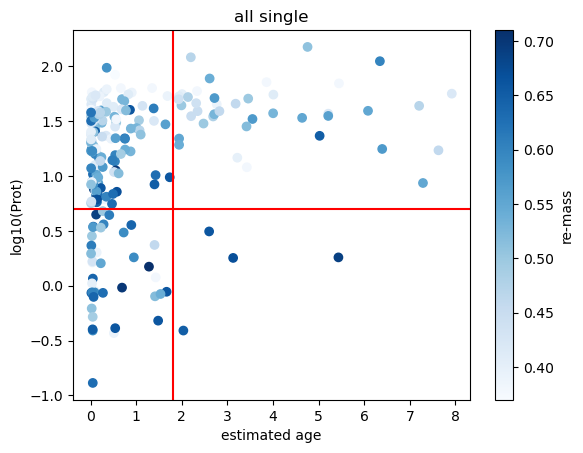

In [28]:
# prot cut at 0.7
plt.scatter(df['age_est'][mask_nonbinary], np.log10(df['Per'][mask_nonbinary]), c = df['reMass'][mask_nonbinary], cmap = 'Blues')
plt.xlabel('estimated age')
plt.ylabel('log10(Prot)')
plt.colorbar(label = 're-mass')
plt.title('all single')
plt.axhline(y = 0.7, color = 'red')
plt.axvline(x = 1.8, color = 'red')
plt.show()

In [14]:
abs_mask = df['abs_Mag'] >= 5.4

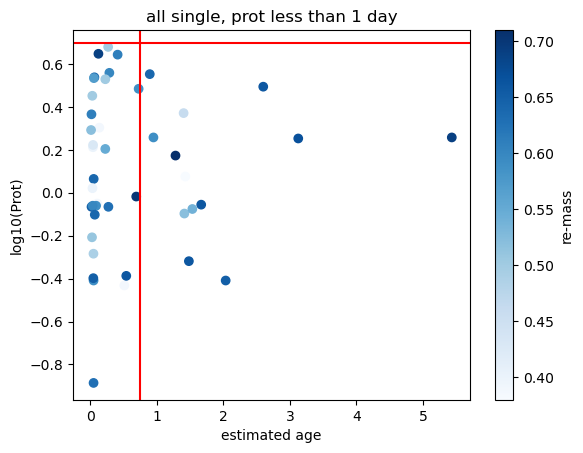

In [16]:
plt.scatter(df['age_est'][final * abs_mask], np.log10(df['Per'][final * abs_mask]), c = df['reMass'][final * abs_mask], cmap = 'Blues')
plt.xlabel('estimated age')
plt.ylabel('log10(Prot)')
plt.colorbar(label = 're-mass')
plt.title('all single, prot less than 1 day')
plt.axhline(y = 0.7, color = 'red')
plt.axvline(x = 0.75, color = 'red')

plt.show()

In [18]:
tbl = df[mask_per]
tbl

main_01_oid,main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,re_v_z,re_v_z_error,age_est,is_in_wds
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,mas / yr,mas / yr,,,,
int32,int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float32,float32,float32,float64,float64,float64,int64
42,57,2207738916728293888,0.65,2.83,0.65,346.52195,63.92595,1.06,Newton17,--,,--,3.6270084,4,41.61606643740591,183.38002,173.60325751559887,-59.07741861346684,10.1436405,1.9495907,-25.152662,0.30876783,1.0596609,0,1,1,0,8.239945659067963,0.56,0.012458135,0.013061908,0.013422214,-25.547009108431617,0.2759845940847087,1.5002161012116033,1
44,59,2282846074981011328,0.49,1.05,0.5,349.85683,79.00133,1.234,Newton17,--,,--,23.469307,0,52.839692674597124,218.07965,209.25030510421288,61.42512797666475,10.915274,2.7040024,-16.96871,2.524462,1.2338614,0,0,1,1,9.530075081446785,0.41,0.021274867,0.024916602,0.025881462,-15.564810143288467,2.4876987152642016,0.5826618239749378,1
53,72,77007084285637888,0.3,4.01,0.31,30.68691,13.57551,1.488,Newton17,--,,--,107.13545,0,26.035391385424443,473.30103,463.0229301723001,-98.1000723671718,12.780594,2.9918928,-15.437941,10.414925,1.4883735,1,0,1,0,9.858414425734114,0.39,0.029598309,0.03734489,0.030667312,-21.089420157872432,2.495186627023786,1.0108792422644368,0
120,174,2051425982875376896,0.18,1.63,0.2,292.80159,36.12449,1.358,Newton17,--,,--,158.11432,1,24.948264508495253,167.84741,-129.7780384480751,-106.44441898370519,12.684928,2.9655247,11.30354,14.287063,1.358463,0,0,1,0,9.670129639945486,0.4,0.022058425,0.021895925,0.026215421,-10.120680722218594,8.534288045998016,0.03862798832378205,1
125,180,1851868127125091840,0.42,0.59,0.43,319.02527,29.86432,19.19,Newton17,--,,--,14.512915,0,50.75995459634728,203.76254,200.46008701811286,36.53663325772578,11.412565,2.789772,-3.878169,0.70258003,19.189732,1,0,1,1,9.940171356103574,0.38,0.40248537,0.3589826,0.39623535,1.0203495698559821,0.3543354099560287,0.010000000000000005,1
134,198,414108140961406208,0.49,0.8,0.5,18.33383,58.92231,1.223,Newton17,--,,--,4.74691,0,36.02500068284353,210.92987,163.80590925091718,-132.88730802125949,10.893871,2.107544,-18.153828,0.3441838,1.2231702,0,0,1,0,8.676891295962816,0.52,0.016983824,0.011917641,0.015560425,-24.57366325384961,0.2907594365518859,1.4128310128732644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,1757,1889703529122914560,0.44,1.64,0.45,342.9758,31.75401,1.423,Newton17,--,,--,6.006895,1,66.20519427385788,526.02374,523.7997213332408,-48.31995310468763,10.501047,2.539195,-3.1008718,0.47714773,1.4225554,1,0,1,1,9.605507455916497,0.41,0.04352633,0.03745682,0.038622715,-4.562624219856819,0.2541152795565643,0.0922531791525505,1


In [20]:
wds_bi = tbl['is_in_wds'] == 1
mask_bi = tbl['ruwe_f'] + tbl['ipd_f'] + tbl['rv_amp_f'] == 1

In [22]:
tbl1 = tbl[~np.logical_or(wds_bi, mask_bi)]
# tbl1.write('../../catalogs/Combined/single_rotators_by_twoflags.vot', format= 'votable', overwrite = True)

In [4]:
tbl1

NameError: name 'tbl1' is not defined

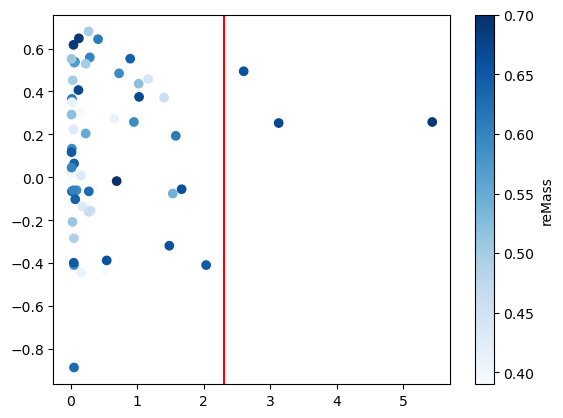

In [50]:
plt.scatter(tbl1['age_est'], np.log10(tbl1['Per']), c =tbl1['reMass'], cmap = 'Blues')
plt.colorbar(label = 'reMass')
plt.axvline(x = 2.3, color ='red')

In [52]:
mask_age = tbl1['age_est'] > 2.3
tbl1[mask_age]

main_01_oid,main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,abs_Mag,reMass,parallax_error,pmra_error,pmdec_error,re_v_z,re_v_z_error,age_est,is_in_wds
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,mas / yr,mas / yr,,,,
int32,int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64,float32,float32,float32,float64,float64,float64,int64
602,1674,1346923802977720320,0.55,1.81,0.47,261.11777,40.34851,1.168,Wright,--,,--,141.05838,0,8.061287170540048,75.425224,-19.412922498071524,-72.88417176647155,12.431025,1.6133041,-71.018425,14.79717,1.1682352,0,0,1,0,6.963046513786116,0.69,0.010753391,0.012738049,0.012486628,-78.9651340105915,9.558378174140026,5.433856874200791,0
613,1692,2112473170548874240,0.54,3.12,0.46,272.18407,39.63853,1.136,Wright,--,,--,127.26584,0,10.23505165391873,110.03074,-27.600592626531476,-106.51277001395488,12.262168,1.7050571,-6.025018,9.119126,1.1357529,0,0,1,0,7.312618124538134,0.66,0.010104493,0.011506757,0.011580536,-42.03074114549865,5.83292370114703,2.5990132782103736,0
615,1696,4589024332166136960,0.6,1.79,0.51,277.56217,31.91509,1.097,Wright,--,,--,139.85588,0,7.710510470449544,94.48098,9.142051674353297,-94.0376474381847,12.820126,1.7456951,5.3543215,9.829015,1.0970608,0,0,1,0,7.255541236081417,0.67,0.012194333,0.011972992,0.012373255,-46.18775825905583,5.265685154236764,3.12524034737488,0


Text(0.5, 1.0, 'checking outliers')

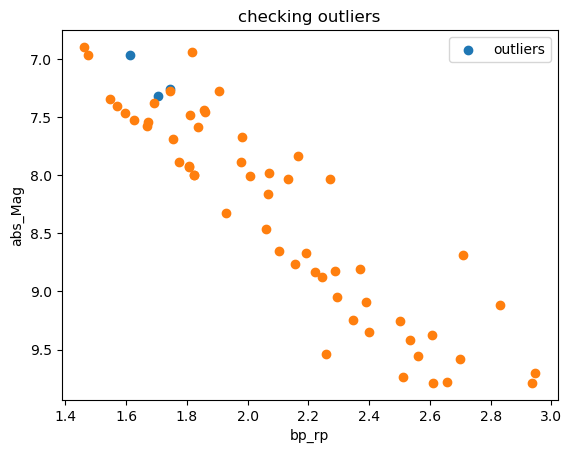

In [54]:
plt.scatter(tbl1['bp_rp'][mask_age], tbl1['abs_Mag'][mask_age], label = 'outliers')
plt.scatter(tbl1['bp_rp'][~mask_age], tbl1['abs_Mag'][~mask_age])
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('bp_rp')
plt.ylabel('abs_Mag')
plt.title('checking outliers')

In [14]:
mask_mass1 = tbl1['reMass'] < 0.4
mask_mass2 = (tbl1['reMass'] > 0.4) & (tbl1['reMass'] < 0.6)
mask_mass3 = tbl1['reMass'] > 0.6

fig, axs = plt.subplots(1,3, figsize = (15,5))
axs[0].scatter(tbl1['age_est'][mask_mass1], np.log10(tbl1['Per'][mask_mass1]), c= tbl1['reMass'][mask_mass1], cmap = 'Blues' ,label='Mass < 0.4')
axs[1].scatter(tbl1['age_est'][mask_mass2], np.log10(tbl1['Per'][mask_mass2]), c= tbl1['reMass'][mask_mass2], cmap = 'Blues' ,label='0.4 < Mass < 0.6')
axs[2].scatter(tbl1['age_est'][mask_mass3], np.log10(tbl1['Per'][mask_mass3]), c= tbl1['reMass'][mask_mass3], cmap = 'Blues' ,label='Mass > 0.6')


axs[0].set_title('Mass < 0.35')
axs[1].set_title('0.35 < Mass < 0.6')
axs[2].set_title('Mass > 0.6')

plt.xlabel('est_age')
plt.ylabel('log10(Prot)')
plt.show()

NameError: name 'tbl1' is not defined

In [378]:
#cross match with WDS catalog -> five stars are binaries
common_source_ids = set(tbl1['source_id']).intersection(set(wds['source_id']))
common_source_ids

set()

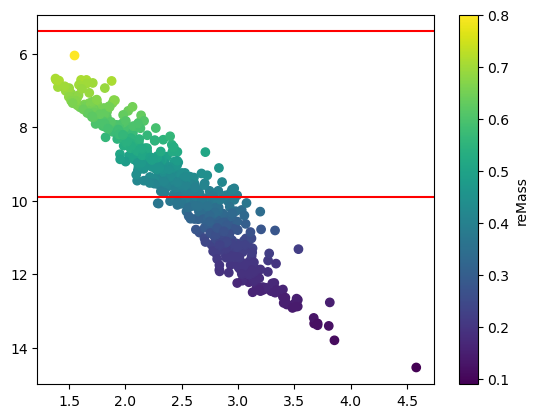

In [46]:
plt.scatter(df['bp_rp'], df['abs_Mag'], c = df['reMass'])
plt.colorbar(label = 'reMass')
plt.gca().invert_yaxis()
plt.axhline(y = 9.9, color = 'red')
plt.axhline(y = 5.4, color = 'red')

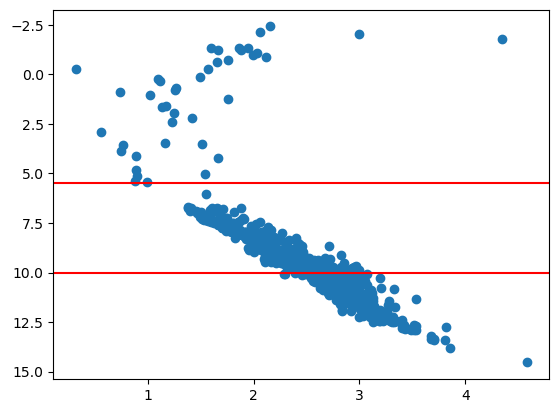

In [50]:
plt.scatter(df['bp_rp'], df['abs_Mag'])
# plt.colorbar(label = 'reMass')
plt.gca().invert_yaxis()
plt.axhline(y = 10, color = 'red')
plt.axhline(y = 5.5, color = 'red')

In [104]:
#removing giants and browns
mask_mag = (df['abs_Mag'] >= 5.4) * (df['abs_Mag'] < 10)
tb = df[mask_mag]
# tb.write('../../catalogs/Combined/single_fast_rotators.vot', format ='votable', overwrite= True)